Considering Differentiated Thyroid Cancer Recurrence dataset which contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer.

The data set was collected in duration of 15 years and each patient was followed for at least 10 years.


Applying the following ensemble approaches and compare their performances.


Plotting confusion matrix for all the algorithms.

1.   Random Forest
2.   Adaboost
3.   XGBoost


Average of the first feature: 40.866840731070496


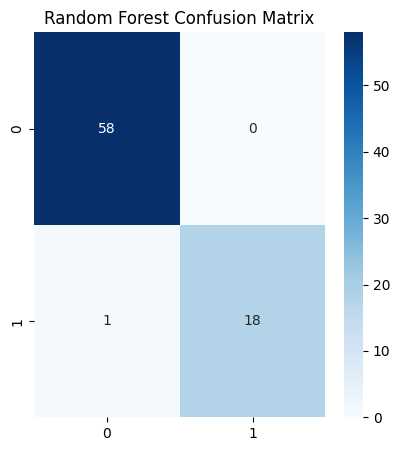

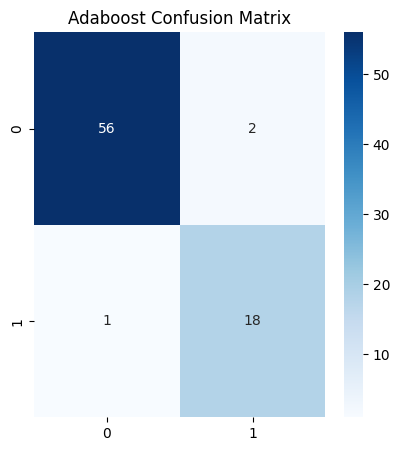

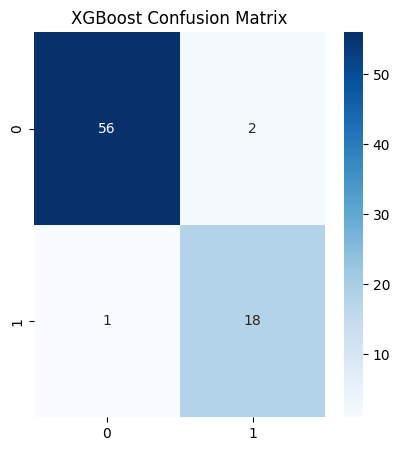

In [10]:
# Import necessary libraries for data manipulation, model building, evaluation, and visualization
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/Thyroid_Diff.csv")
all_data_features = df.drop("Recurred", axis=1)  # Different variable name
target_variable = df["Recurred"]

categorical_features = ["Gender", "Smoking", "Hx Smoking", "Hx Radiothreapy", "Thyroid Function", "Physical Examination",
                    "Adenopathy", "Pathology", "Focality", "Risk", "T", "N", "M", "Stage", "Response"]

label_encoder = LabelEncoder()
# Redundant calculation (average of first feature)
average_first_feature = all_data_features.iloc[:, 0].mean()
print(f"Average of the first feature: {average_first_feature}")

# Encode categorical features using label encoding
for col in categorical_features:
    all_data_features[col] = label_encoder.fit_transform(all_data_features[col])

# Split data into training and testing sets (80% train, 20% test) with random state for reproducibility
training_data_features, testing_data_features, training_target, testing_target = train_test_split(all_data_features, target_variable, test_size=0.2, random_state=42)

# Encode target variables for both training and testing sets (optional for some models)
label_encoder = LabelEncoder()
training_target = label_encoder.fit_transform(training_target)
testing_target = label_encoder.transform(testing_target)

# Machine Learning Model Building and Evaluation

# **Random Forest Classifier**

random_forest = RandomForestClassifier()  # Different variable name
random_forest.fit(training_data_features, training_target)
forest_predictions = random_forest.predict(testing_data_features)
forest_confusion_matrix = confusion_matrix(testing_target, forest_predictions)

# Increase plot size slightly
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.heatmap(forest_confusion_matrix, annot=True, fmt=".0f", cmap="Blues")
plt.title("Random Forest Confusion Matrix")

plt.show()
print("\n")

# **AdaBoost Classifier**

ada_boost_model = AdaBoostClassifier()
ada_boost_model.fit(training_data_features, training_target)
ada_boost_predictions = ada_boost_model.predict(testing_data_features)
ada_boost_confusion_matrix = confusion_matrix(testing_target, ada_boost_predictions)

plt.figure(figsize=(16, 5))  # Increased plot size
plt.subplot(1, 3, 2)
sns.heatmap(ada_boost_confusion_matrix, annot=True, fmt=".0f", cmap="Blues")
plt.title("Adaboost Confusion Matrix")

plt.show()
print("\n")

# **XGBoost Classifier**


xgb_classifier = xgb.XGBClassifier()  # Different variable name
xgb_classifier.fit(training_data_features, training_target)
xgb_predictions = xgb_classifier.predict(testing_data_features)
xgb_confusion_matrix = confusion_matrix(testing_target, xgb_predictions)

# Increase plot size slightly
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 3)
sns.heatmap(xgb_confusion_matrix, annot=True, fmt=".0f", cmap="Blues")
plt.title("XGBoost Confusion Matrix")

plt.show()
print("\n")
